# Random Forest

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Зададим нужные константы для обучения:

In [2]:
# we perform T*Q-fold cross validation (T*Q-fold CV)
T = 3  # number of performing cross validations
Q = 5  # number of folds

Загрузим подготовленные данные:

In [3]:
from sklearn.externals import joblib

# X_train = joblib.load('../data/X_train.pkl')
# y_train = joblib.load('../data/y_train.pkl')

X_train = joblib.load('../tmp/1467_X_train.pkl')
y_train = joblib.load('../tmp/1467_y_train.pkl')

display(X_train)

,DIRECTORY_ENTRY_BOUND_IMPORT/exists,DIRECTORY_ENTRY_DEBUG/exists,DIRECTORY_ENTRY_DELAY_IMPORT/exists,DIRECTORY_ENTRY_EXPORT/exists,DIRECTORY_ENTRY_IMPORT/exists,DIRECTORY_ENTRY_RESOURCE/exists,DIRECTORY_ENTRY_TLS/exists,DOSStub/entropy,DOSStub/zeros,DOS_HEADER.e_cblp,...,SECTIONS/entry_point_in_last_section,SECTIONS/entry_point_in_writeable_section,SECTIONS/executable_sections,SECTIONS/max_section_entropy,SECTIONS/rsrc_section_entropy,SECTIONS/sections_with_zero_entropy_count,SECTIONS/text_section_entropy,SECTIONS/unusual_section_names,SECTIONS/writeable_and_executable_sections,SECTIONS/writeable_sections
606,-0.144660,-0.536793,-0.161672,-0.297118,-0.020491,0.318357,1.904668,-1.807402,1.891480,-0.077896,...,-0.227185,-0.451049,-0.208515,-0.320202,-0.003806,1.979674,-1.854391,0.967222,-0.221265,0.786845
978,-0.144660,-0.536793,10.649641,3.365669,0.524576,0.318357,1.904668,-1.807402,1.891480,-0.077896,...,-0.227185,-0.451049,0.344634,-0.157925,0.446348,1.102278,0.572942,-0.400187,-0.221265,1.234422
829,-0.144660,-0.536793,-0.161672,-0.297118,-0.020491,-3.141125,-0.525026,0.337924,-0.547450,-0.023980,...,4.401704,-0.451049,0.344634,0.453500,-2.087063,0.224881,0.825052,0.055616,0.328898,0.786845
220,-0.144660,-0.536793,-0.161672,-0.297118,-0.129504,0.318357,-0.525026,0.337924,-0.547450,-0.023980,...,-0.227185,-0.451049,-0.208515,-1.629135,-0.187667,-0.652515,-0.462842,-0.400187,-0.221265,-0.555886
660,-0.144660,-0.536793,-0.161672,-0.297118,0.088522,0.318357,-0.525026,0.680721,-0.587296,-0.023980,...,-0.227185,-0.451049,-0.208515,-0.263424,0.327982,-0.652515,0.609391,-0.400187,-0.221265,-0.555886
1221,-0.144660,-0.536793,-0.161672,-0.297118,-0.074998,0.318357,-0.525026,0.337924,-0.547450,-0.023980,...,-0.227185,2.217053,0.897782,-0.784343,0.267402,-0.652515,0.452691,0.055616,0.879061,0.339268
909,-0.144660,-0.536793,-0.161672,-0.297118,0.279296,0.318357,1.904668,-1.807402,1.891480,-0.077896,...,-0.227185,-0.451049,-0.208515,1.082192,1.489812,1.979674,-1.854391,0.967222,-0.221265,0.786845
181,-0.144660,0.949009,0.514035,-0.297118,0.442816,0.318357,-0.525026,0.598019,-0.605005,-0.023980,...,-0.227185,-0.451049,-0.208515,-0.259114,0.458613,-0.652515,0.610688,-0.400187,-0.221265,-0.555886
165,-0.144660,-0.536793,-0.161672,-0.297118,0.279296,0.318357,1.904668,-1.807402,1.891480,-0.077896,...,-0.227185,-0.451049,0.344634,-0.227993,0.702829,1.102278,0.563115,-0.400187,-0.221265,0.786845
474,-0.144660,-0.536793,-0.161672,-0.297118,-0.047744,0.318357,-0.525026,0.527202,-0.547450,-0.023980,...,-0.227185,-0.451049,-0.208515,-0.827830,0.764978,-0.652515,0.439610,-0.400187,-0.221265,-0.555886


Теперь настроим гиперпараметры (число деревьев, число используемых признаков при делении вершины дерева и критерий деления вершины):

criterion = entropy ; max_features = 3 ;
                    estimators_number = 5 ; accuracy = 0.819085603784661
criterion = entropy ; max_features = 3 ;
                    estimators_number = 10 ; accuracy = 0.8421699644324735
criterion = entropy ; max_features = 3 ;
                    estimators_number = 25 ; accuracy = 0.8615093753237335
criterion = entropy ; max_features = 3 ;
                    estimators_number = 50 ; accuracy = 0.8706688766877309
criterion = entropy ; max_features = 3 ;
                    estimators_number = 75 ; accuracy = 0.866929106668048
criterion = entropy ; max_features = 3 ;
                    estimators_number = 100 ; accuracy = 0.8700006906315828
criterion = entropy ; max_features = 5 ;
                    estimators_number = 5 ; accuracy = 0.8319710625366898
criterion = entropy ; max_features = 5 ;
                    estimators_number = 10 ; accuracy = 0.8536966055457716
criterion = entropy ; max_features = 5 ;
                    estimators_num

best_accuracy = 0.876442556718


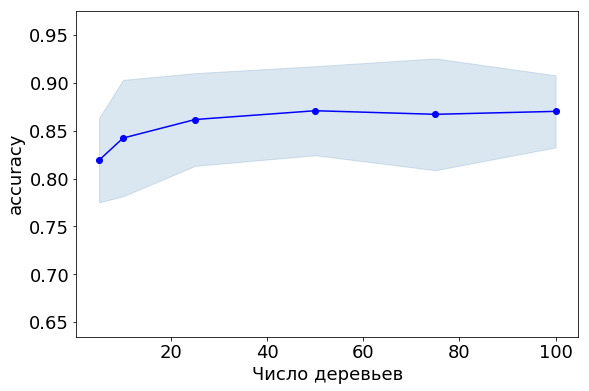

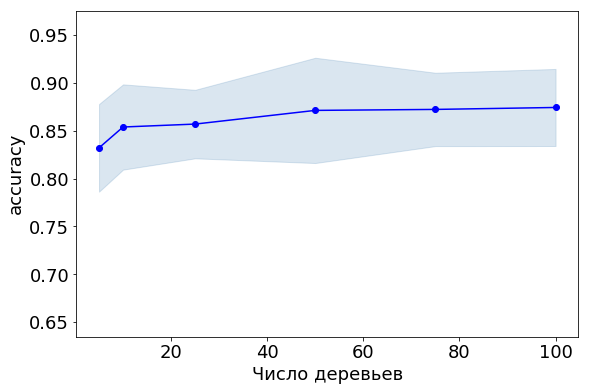

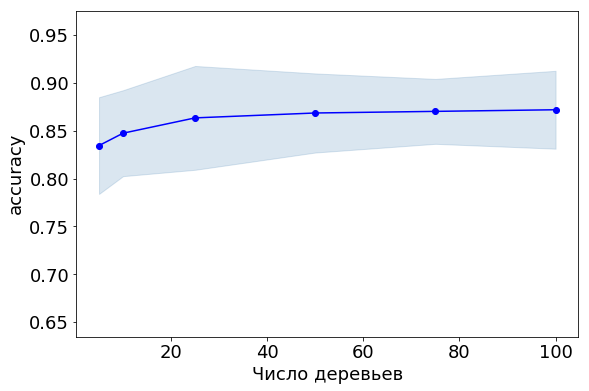

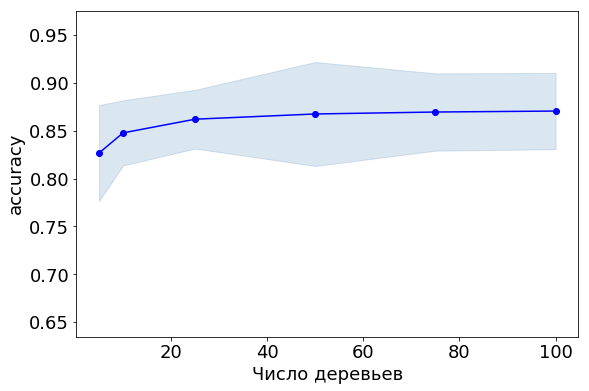

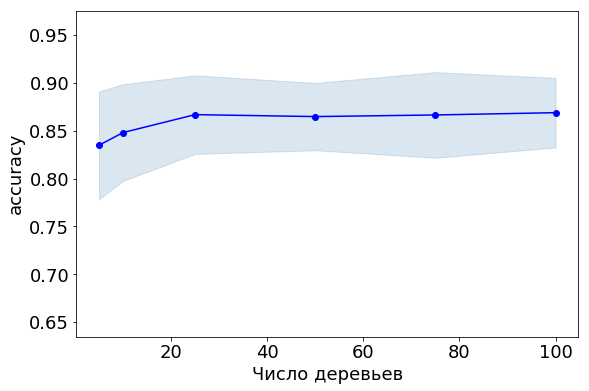

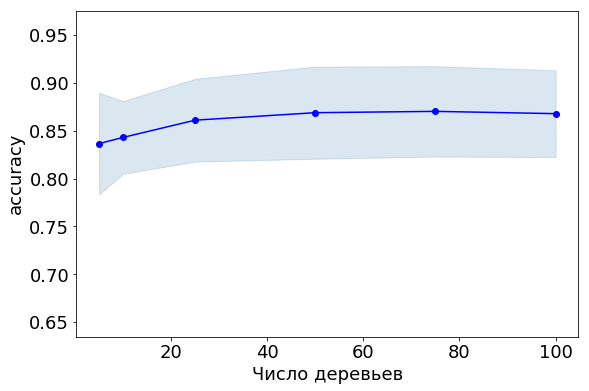

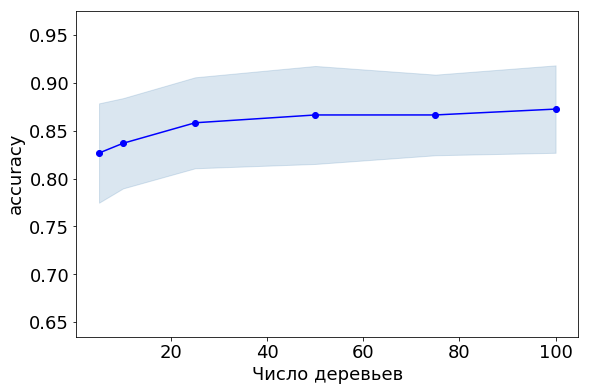

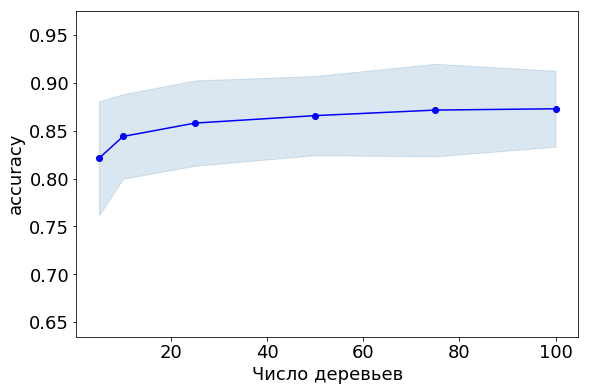

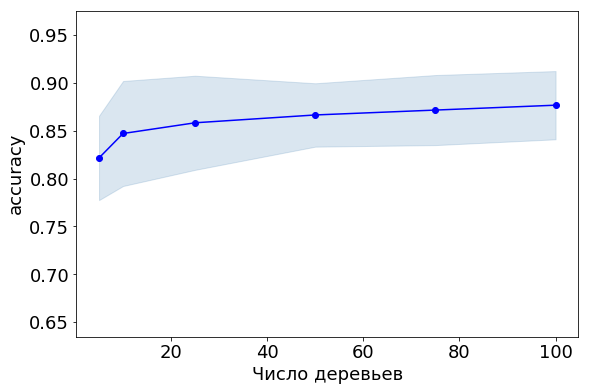

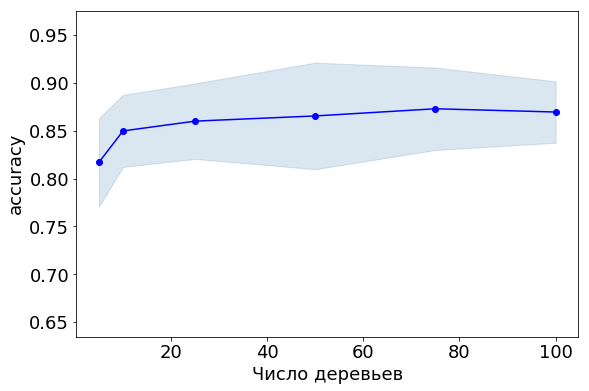

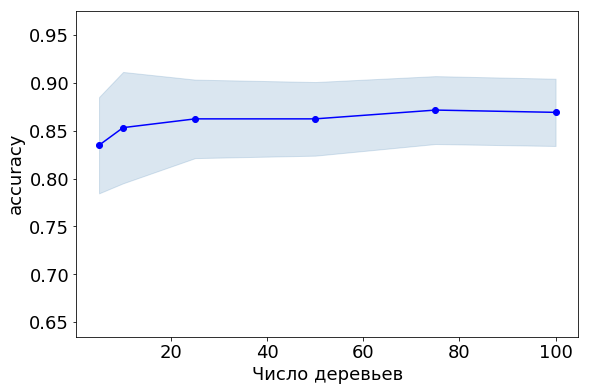

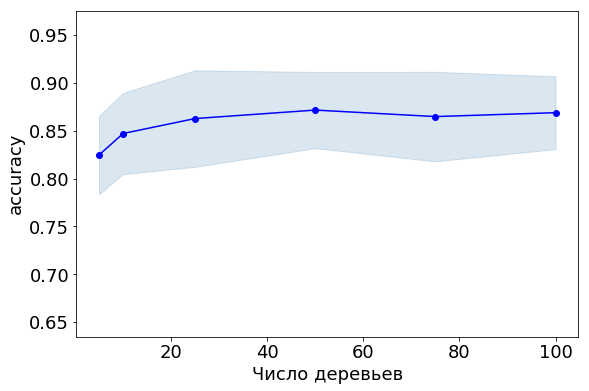

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RepeatedKFold
from sklearn.metrics import confusion_matrix


def test_classifier(classifier, X, y):
    tns, fps, fns, tps = ([], [], [], [])

    rkf = RepeatedKFold(n_splits=Q, n_repeats=T, random_state=32)
    for train_index, test_index in rkf.split(X):
        curr_X_train, curr_X_test = X.iloc[train_index], X.iloc[test_index]
        curr_y_train, curr_y_test = y.iloc[train_index], y.iloc[test_index]
        classifier.fit(curr_X_train, curr_y_train)
        curr_y_pred = classifier.predict(curr_X_test)
        curr_tn, curr_fp, curr_fn, curr_tp = (
            confusion_matrix(curr_y_test, curr_y_pred).ravel()
        )

        curr_test_size = curr_tn + curr_fp + curr_fn + curr_tp
        assert(curr_test_size == len(curr_X_test)
                   and curr_test_size == len(curr_y_test))
        tns.append({
            'tn': curr_tn,
            'test_size': curr_test_size,
            'tn_rate': curr_tn/curr_test_size,
        })
        fps.append({
            'fp': curr_fp,
            'test_size': curr_test_size,
            'fp_rate': curr_fp/curr_test_size,
        })
        fns.append({
            'fn': curr_fn,
            'test_size': curr_test_size,
            'fn_rate': curr_fn/curr_test_size,
        })
        tps.append({
            'tp': curr_tp,
            'test_size': curr_test_size,
            'tp_rate': curr_tp/curr_test_size,
        })

    tns_df = pd.DataFrame(tns)
    fps_df = pd.DataFrame(fps)
    fns_df = pd.DataFrame(fns)
    tps_df = pd.DataFrame(tps)
    return (tns_df, fps_df, fns_df, tps_df)


def make_plot(accuracies, deviations, criterion,
              max_features, estimators_numbers):
    assert(len(accuracies) == len(deviations))
    plt.figure(figsize=(9, 6))
    
    upper = []
    lower = []
    for i in range(len(accuracies)):
        upper.append(accuracies[i] + deviations[i])
        lower.append(accuracies[i] - deviations[i])
    plt.fill_between(
        estimators_numbers,
        upper,
        lower,
        alpha=0.2,
        color='steelblue',
        lw=1
    )
    
    # plt.grid(True)
    plt.ylim([0.635, 0.975])
    plt.xlabel('Число деревьев', fontsize=18)
    plt.ylabel('accuracy', fontsize=18)
    ax = plt.gca()
    ax.margins(0.05)
    ax.tick_params(axis='both', which='major', labelsize=18)
    ax.tick_params(axis='both', which='minor', labelsize=18)
    plt.plot(estimators_numbers, accuracies, color='blue', marker='o')
    plt.savefig(
        '../results/rf/choosing_hyperparameters/{0}{1}.svg'.format(
            criterion, max_features
        ),
        format='svg',
        dpi=72
    )


def choose_hyperparameters(X_train, y_train):
    estimators_numbers = (
        5, 10, 25, 50, 75, 100, 200, 300, 400, 500, 750, 1000
    )
    max_features_numbers = (3, 5, 7, 10, 15, 20)
    criterions = ('entropy', 'gini')
    best_accuracy = 0.0
    
    for curr_criterion in criterions:
        for curr_max_features in max_features_numbers:
            accuracies = []
            deviations = []
            for curr_estimators_number in estimators_numbers:
                curr_rf_classifier = RandomForestClassifier(
                    n_estimators=curr_estimators_number,
                    max_features=curr_max_features,
                    criterion=curr_criterion
                )
                curr_tns_df, curr_fps_df, curr_fns_df, curr_tps_df = (
                    test_classifier(curr_rf_classifier, X_train, y_train)
                )

                curr_accuracies = []
                for i in range(T*Q):
                    curr_tn_rate = curr_tns_df.at[i, 'tn_rate']
                    curr_fp_rate = curr_fps_df.at[i, 'fp_rate']
                    curr_fn_rate = curr_fns_df.at[i, 'fn_rate']
                    curr_tp_rate = curr_tps_df.at[i, 'tp_rate']
                    curr_accuracies.append(
                        (curr_tp_rate + curr_tn_rate)/
                        (curr_tp_rate + curr_tn_rate + curr_fp_rate + curr_fn_rate)
                    )
                curr_avg_accuracy = sum(curr_accuracies)/len(curr_accuracies)
                accuracies.append(curr_avg_accuracy)
                deviations.append(np.array(curr_accuracies).std()*2)

                print(
                    """criterion = {0} ; max_features = {1} ;
                    estimators_number = {2} ; accuracy = {3}""".format(
                        curr_criterion, curr_max_features,
                        curr_estimators_number, curr_avg_accuracy
                    )
                )
                if curr_avg_accuracy > best_accuracy:
                    best_accuracy = curr_avg_accuracy

            make_plot(accuracies, deviations,
                      curr_criterion, curr_max_features, estimators_numbers)
        
                
    print('================================')
    print('best_accuracy =', best_accuracy)


choose_hyperparameters(X_train, y_train)

### К этому моменту мы настроили гиперпараметры!

Теперь нужно указать подобранные гиперпараметры в качестве следующих констант:
* BEST_ESTIMATORS_N --- количество деревьев в случайном лесе
* BEST_MAX_FEATURES --- число используемых признаков при делении вершины дерева
* BEST_CRITERION    --- критерий разделения узла дерева

In [4]:
BEST_ESTIMATORS_N = 500
BEST_MAX_FEATURES = 5
BEST_CRITERION = 'entropy'

Создадим объект классификатора с настроенными гиперпараметрами:

In [5]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(
    n_estimators=BEST_ESTIMATORS_N,
    max_features=BEST_MAX_FEATURES,
    criterion=BEST_CRITERION
)

Обучим классификатор на обучающей выборке (X_train, y_train):

In [6]:
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features=5, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

### На данном этапе процесс обучения завершён!

Сохраним классификатор на диск.

In [7]:
from sklearn.externals import joblib
joblib.dump(rf_classifier, '../results/rf/rf_classifier.pkl')

['../results/rf/rf_classifier.pkl']

Посмотрим на важность признаков:

In [8]:
# rf_classifier.feature_importances_

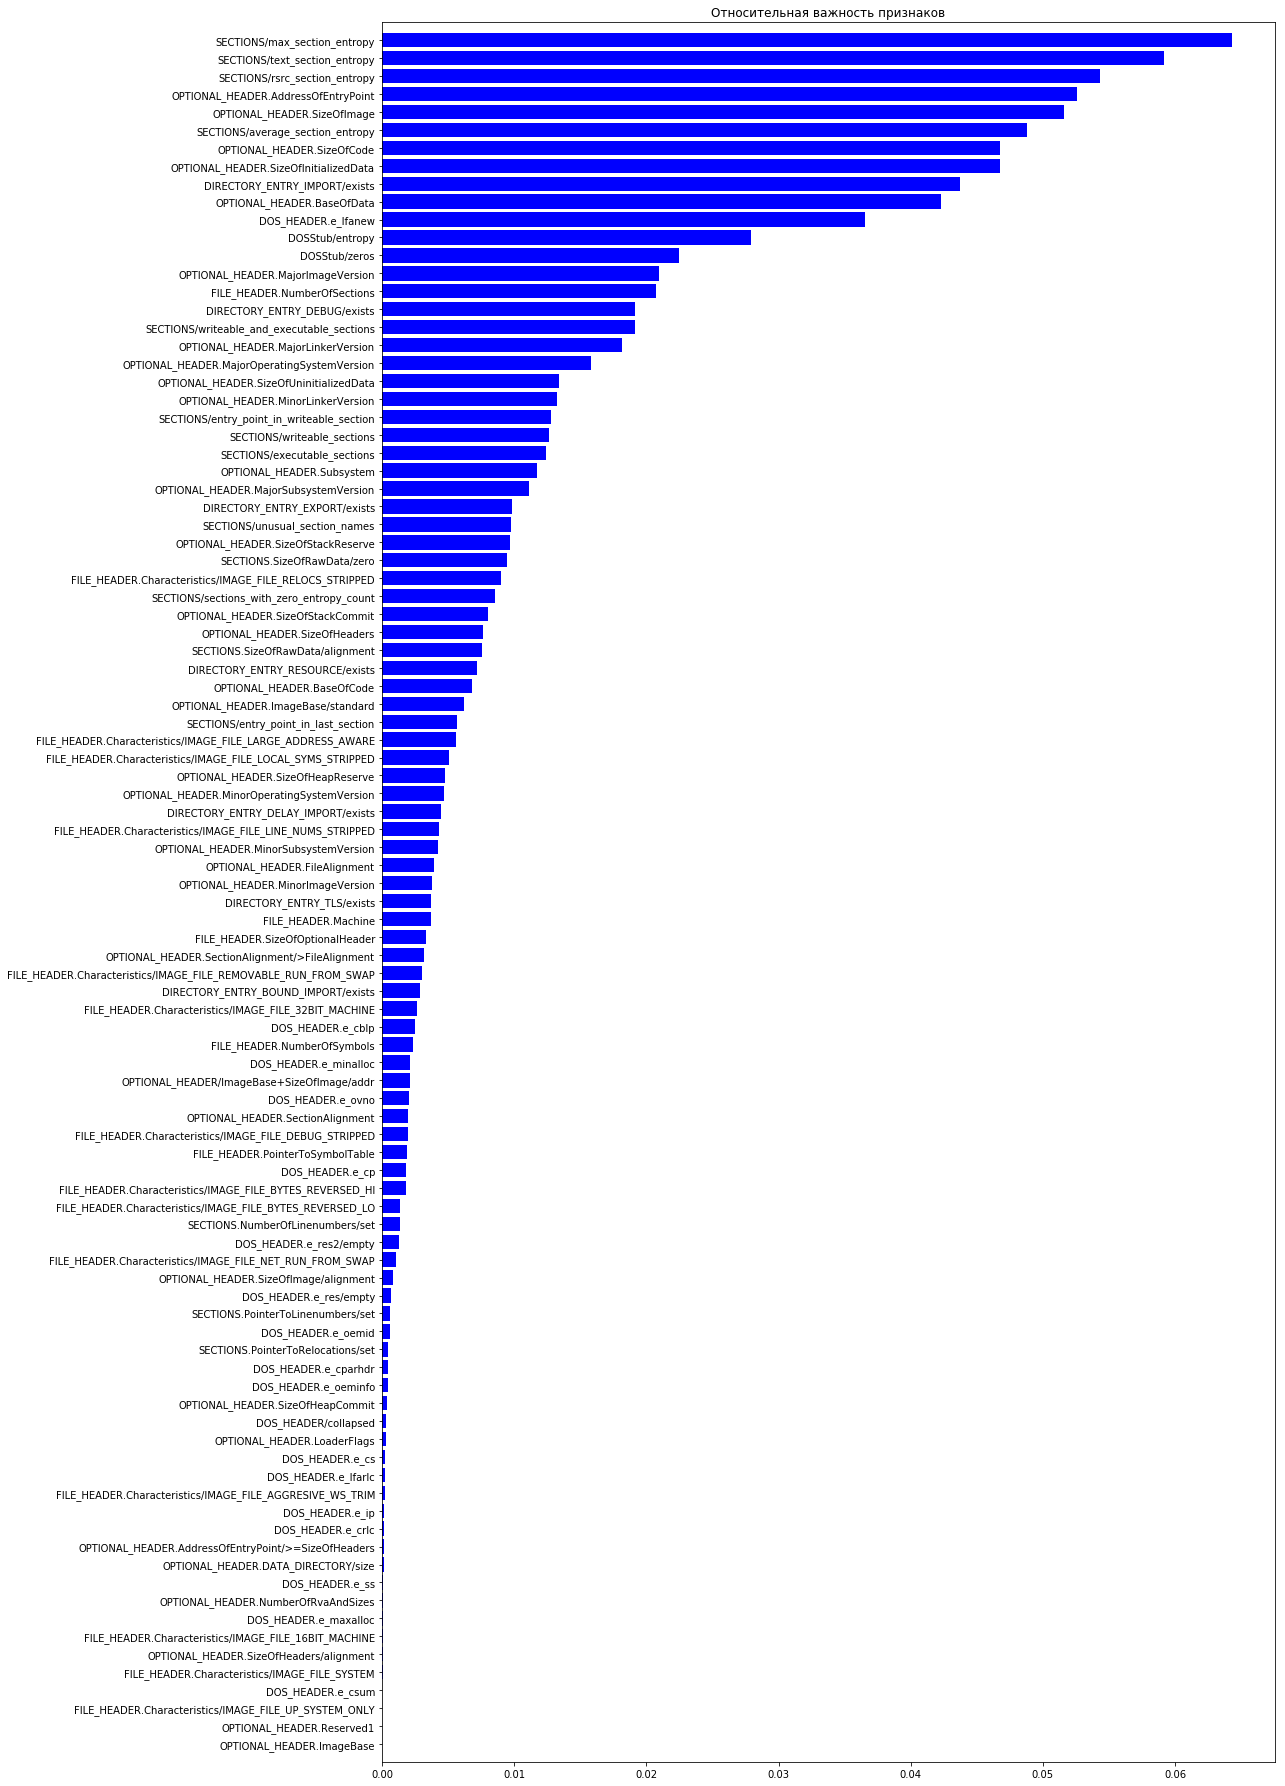

In [9]:
features = list(X_train.columns.values)
# display(features)
importances = rf_classifier.feature_importances_
indices = np.argsort(importances)
# display(indices)

plt.figure(figsize=(20, 32))
plt.gcf().subplots_adjust(left=0.28)
plt.title('Относительная важность признаков')
plt.barh(
    range(X_train.shape[1]),
    importances[indices],
    color='b', align='center'
)

sorted_features = []
for idx in indices:
    sorted_features.append(features[idx])
    
plt.yticks(range(X_train.shape[1]), sorted_features)
plt.ylim([-1, X_train.shape[1]])
plt.savefig(
    '../results/rf/feature_importances.svg',
    format='svg',
    dpi=1200
)
plt.show()